In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn


In [ ]:
import pandas as pd


df = pd.read_csv("CVD_cleaned.csv")

# Display first few rows
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [ ]:
# Check for missing values
print(df.isnull().sum())

# Drop missing values (if needed)
df = df.dropna()

# Convert categorical variables to numerical (modify as per your dataset)
df = pd.get_dummies(df, drop_first=True)

# Display dataset info after preprocessing
df.info()

General_Health                  0
Checkup                         1
Exercise                        1
Heart_Disease                   1
Skin_Cancer                     1
Other_Cancer                    1
Depression                      1
Diabetes                        1
Arthritis                       1
Sex                             1
Age_Category                    1
Height_(cm)                     1
Weight_(kg)                     1
BMI                             1
Smoking_History                 1
Alcohol_Consumption             1
Fruit_Consumption               1
Green_Vegetables_Consumption    1
FriedPotato_Consumption         1
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 231675 entries, 0 to 231674
Data columns (total 38 columns):
 #   Column                                               Non-Null Count   Dtype  
---  ------                                               --------------   -----  
 0   Height_(cm)                                          231675 non-

In [ ]:
print(df.columns)

Index(['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption',
       'Fruit_Consumption', 'Green_Vegetables_Consumption',
       'FriedPotato_Consumption', 'General_Health_Fair', 'General_Health_Good',
       'General_Health_Poor', 'General_Health_Very Good', 'Checkup_Never',
       'Checkup_Within the past 2 years', 'Checkup_Within the past 5 years',
       'Checkup_Within the past year', 'Exercise_Yes', 'Heart_Disease_Yes',
       'Skin_Cancer_Yes', 'Other_Cancer_Yes', 'Depression_Yes',
       'Diabetes_No, pre-diabetes or borderline diabetes', 'Diabetes_Yes',
       'Diabetes_Yes, but female told only during pregnancy', 'Arthritis_Yes',
       'Sex_Male', 'Age_Category_25-29', 'Age_Category_30-34',
       'Age_Category_35-39', 'Age_Category_40-44', 'Age_Category_45-49',
       'Age_Category_50-54', 'Age_Category_55-59', 'Age_Category_60-64',
       'Age_Category_65-69', 'Age_Category_70-74', 'Age_Category_75-79',
       'Age_Category_80+', 'Smoking_History_Yes'],
      dtype='o

In [ ]:
from sklearn.model_selection import train_test_split

# Define Features (X) and Target (Y) - Modify column names as needed
X = df.drop("Heart_Disease_Yes", axis=1)  # Independent variables
y = df["Heart_Disease_Yes"]  # Target variable

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split complete!")

Data split complete!


In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Initialize models
svm_model = SVC()
rf_model = RandomForestClassifier()
lr_model = LogisticRegression()

# Train models
svm_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)

print("Models trained successfully!")

Models trained successfully!


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("-" * 50)

# Evaluate all models
print("SVM Model:")
evaluate_model(svm_model, X_test, y_test)

print("Random Forest Model:")
evaluate_model(rf_model, X_test, y_test)

print("Logistic Regression Model:")
evaluate_model(lr_model, X_test, y_test)

SVM Model:
Accuracy: 0.9200388475234704
Classification Report:
               precision    recall  f1-score   support

       False       0.92      1.00      0.96     42630
        True       0.00      0.00      0.00      3705

    accuracy                           0.92     46335
   macro avg       0.46      0.50      0.48     46335
weighted avg       0.85      0.92      0.88     46335

Confusion Matrix:
 [[42630     0]
 [ 3705     0]]
--------------------------------------------------
Random Forest Model:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.9197582820761843
Classification Report:
               precision    recall  f1-score   support

       False       0.92      1.00      0.96     42630
        True       0.48      0.04      0.07      3705

    accuracy                           0.92     46335
   macro avg       0.70      0.52      0.52     46335
weighted avg       0.89      0.92      0.89     46335

Confusion Matrix:
 [[42469   161]
 [ 3557   148]]
--------------------------------------------------
Logistic Regression Model:
Accuracy: 0.9199741016510198
Classification Report:
               precision    recall  f1-score   support

       False       0.92      0.99      0.96     42630
        True       0.50      0.07      0.12      3705

    accuracy                           0.92     46335
   macro avg       0.71      0.53      0.54     46335
weighted avg       0.89      0.92      0.89     46335

Confusion Matrix:
 [[42384   246]
 [ 3462   243]]
--------------------------------------------------


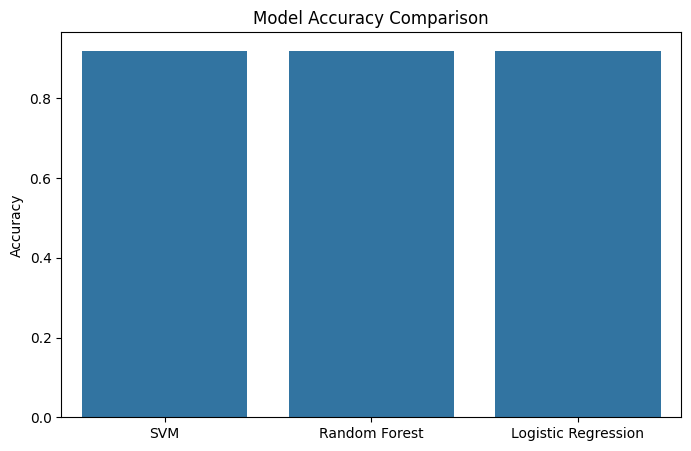

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Store accuracies
accuracies = {
    "SVM": accuracy_score(y_test, svm_model.predict(X_test)),
    "Random Forest": accuracy_score(y_test, rf_model.predict(X_test)),
    "Logistic Regression": accuracy_score(y_test, lr_model.predict(X_test))
}

# Plot bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Perform Randomized Search
rf_random = RandomizedSearchCV(RandomForestClassifier(), param_grid, cv=5, n_iter=10, random_state=42)
rf_random.fit(X_train, y_train)

# Best parameters
print("Best Parameters for Random Forest:", rf_random.best_params_)

Best Parameters for Random Forest: {'n_estimators': 10, 'min_samples_split': 2, 'max_depth': 10}


In [ ]:
import numpy as np

# Take one row from X_test and predict
sample_input = X_test.iloc[0].values.reshape(1, -1)

# Get prediction
prediction = rf_random.best_estimator_.predict(sample_input)

print("Predicted Health Status:", "Diseased" if prediction[0] == 1 else "Healthy")

Predicted Health Status: Healthy


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
